<a href="https://colab.research.google.com/github/AC-Pyre/Tensorflow_fundamentals/blob/main/01_neural_network_regression_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: prediction a numerical variable based on some other combination of variables, even shorter... predicting a number

In [152]:
# Import tensorflow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

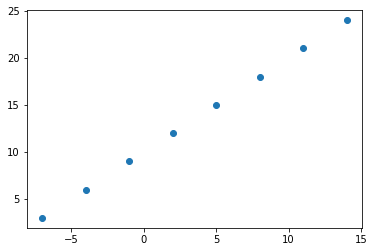

In [153]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, Y);



## Input and output shapes

In [154]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [155]:
input_shape = X.shape
output_shape = Y.shape
input_shape, output_shape

((8,), (8,))

In [156]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
Y = tf.constant(Y)
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [157]:
input_shape = X[0].shape 
output_shape = Y[0].shape 
input_shape, output_shape


(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as  the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & Y (features and labels)
4. **Evaluate the model**

In [158]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(X, Y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 287ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748


In [159]:
model.predict([17.0])

array([[12.716021]], dtype=float32)

## Improve our model

We can improve our model, by altering the steps we took to create a model

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of layer.
2. **Compiling a model** - Here we might change the optimization fucntion or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer or on more data (five the model more examples to learn from).


In [160]:
# Let's rebuild our model

#1 create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2 Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3 Fit the model
model.fit(X, Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 259ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 7m

In [161]:
# Remind ourselves of the data
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [162]:
# Let's see if our model's prediction has improved...
model.predict([17.])

array([[29.739855]], dtype=float32)

In [163]:
model_1 = tf.keras.Sequential([
  # tf.keras.layers.Dense(100, activation="relu"),
  # tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=.1),
              metrics=["mae"])

model_1.fit(X, Y, epochs=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 0s 318ms/step - loss: 10.5736 - mae: 10.5736
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 10.1236 - mae: 10.1236
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 9.6736 - mae: 9.6736
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 9.2236 - mae: 9.2236
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 8.7736 - mae: 8.7736
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 8.3236 - mae: 8.3236
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 7.8736 - mae: 7.8736
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 7.4236 - mae: 7.4236
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9736 - mae: 6.9736
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 6.8250 - mae: 6.8250
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 6

In [164]:
model_1.predict([17.])

array([[27.497078]], dtype=float32)

In [165]:
# More improving, just add hidden layer

model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])

model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(X, Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 318ms/step - loss: 14.0407 - mae: 14.0407
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 13.4800 - mae: 13.4800
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 12.9217 - mae: 12.9217
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 12.3612 - mae: 12.3612
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 11.7937 - mae: 11.7937
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 11.2106 - mae: 11.2106
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 10.6209 - mae: 10.6209
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 10.0058 - mae: 10.0058
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 9.3625 - mae: 9.3625
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 8.6887 - mae: 8.6887
Epoch 11/100
1/1 [==============================] - 0s 5ms/st

In [166]:
model.predict([17.0])

array([[31.727652]], dtype=float32)

### Common ways to improve a deep model:

* adding layers
* increase the number of hidden units
* change the activation functions
* change the omptimization function
* change the learning rate (lr) (on Adam) (potentially the most important yperparamater of many learning models)
* fitting more data
* fitting for longer (add epochs)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
build a model -> fit it -> evaluate it -> tweek it -> fit it -> evaluate it -> tweek it... ect...
```

### when it comes to evaluation... there are three words you should memorize:

> "Visualize, visualize, visualize"

its a good idea to visualize:
* the data - what data are we working with? what does it look like?
* the model itself - what does our model look like?
* the training of a model - how does a model perform while it learns?
* the predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?


In [167]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [168]:
# Make labels for the dataset
Y = X + 10
Y


<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

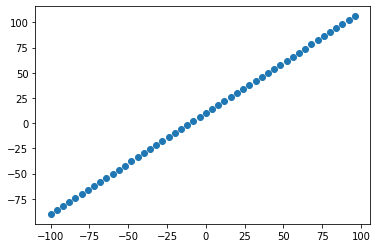

In [169]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, Y)

# The three sets... (possibly the most important concept in machine learning)

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available
  * (course materials)
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
  * (Practice exam)
* **Test set** - the model gets evaluated on this data to test what has been learned, this set is typically 10-15% of the total data available.
  * (final exam)

In [170]:
# check the length of how many samples we have
len(X)


50

In [171]:
# Split the data into train at test sets
x_train = X[:40] # first 40 are training sampels (80% of the data)
y_train = Y[:40]

x_test = X [40:] # last 10 are testing samples (20% of the data)
y_test = Y[40:]

len(x_train), len(x_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again!

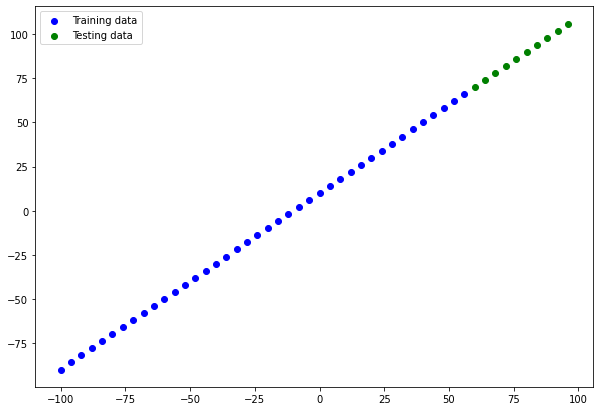

In [172]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(x_train, y_train, c="b", label="Training data")
#plot test data in green
plt.scatter(x_test, y_test, c="g", label="Testing data")
plt.legend();

In [173]:
# Let's have a look at how to build a neural network

# 1. Creat the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
# model.fit(x_train, y_train, epochs=100)

In [174]:
model.summary()

ValueError: ignored

In [ ]:
# Let's create a model which builds automatically by defining the imput_shape argument
# create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1], name="input_layer"),
  tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.summary()

* Total params - total number of parameters in the model.
* Trainable params - these are the parameters (patterns) the model can update as it trains
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learned patterns or parameters from other models during **transfer learning**.

In [ ]:
# Let's fit our model to the training data
model.fit(x_train, y_train, epochs=100, verbose=0)

In [ ]:
# Get a summary of our model
model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` vs `y_pred` (ground truth versus your model's predictions).


In [ ]:
# Make some predictions
y_pred = model.predict(x_test)
y_pred

In [ ]:
y_test

### **Note:** If you feel like you're going to reuse some kind of functionality in the future, its' a good idea to turn it into a function.

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth 1
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  #Show the legend
  plt.legend();

In [ ]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performence.

Since we're working on a regression, two of the main metrics"
* MAE - mean absolute error, "on average, how lwrong is each of my model's predictions"
  * Great as a starter
* MSE - mean square error, "square the average errors"
  * When larger errors are more significant than smaller errors
* Huber - Combination of MSE and MAE. 
  * Less sensitive to outliers than MSE

In [ ]:
# Evaluate the model on the test set
model.evaluate(x_test, y_test)

In [ ]:
# Calculate the mean absolute error
tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))

In [ ]:
y_pred

In [ ]:
y_test

In [ ]:
# Caluculate the mean square error
tf.metrics.mean_squared_error(y_true=y_test,
                              y_pred=tf.squeeze(y_pred))


In [ ]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))
  
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))


### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it ect...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come int the form of more layers or more hidden units in each layer
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trainded for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(x_train, y_train, epochs=100)

In [ ]:
# Make and plot precitions for model_1
y_preds_1 = model_1.predict(x_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1.numpy(), mse_1.numpy()


**Build `model_2`**

* 2 dense layers, trainded for 100 epochs

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(x_train, y_train, epochs=100)

In [ ]:
y_preds_2 = model_2.predict(x_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2.numpy(), mse_2.numpy()

**Build `model_3`**
* 2 layers trained for 500 epochs

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(x_train, y_train, epochs=500)

In [ ]:
y_preds_3 = model_3.predict(x_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

## Comparing the results of our experiments

We've run a few experiments, lets compare the results

In [ ]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

**Note:** One of your main goals should be to minimize the time between experiments. the more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figure out what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment".

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments

Luckily, there are tools to help us!


**Resource:** As you build more models, you'll want to look into using:
* TensorBoard - a component of the tensorflow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straght into TensorBord).

## Saving our models

* Saving our models allows us to use them outside of Google collab

There are two main formats we can saver our models's too:
1. The Saved Model format
2. The HDF5 format

In [ ]:
model_2.save("best_model_savedModel_format")

In [ ]:
# Save model using the HD5 format ( if using outside pure tensorflow code )
model_2.save("best_model_HDF5_format.H5")

## Loading in a saved model

In [ ]:
# Load in the savedModel format model
loaded_savedModel_format = tf.keras.models.load_model("/content/best_model_savedModel_format")
loaded_savedModel_format.summary()

In [ ]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(x_test)
loaded_savedModel_format_preds = loaded_savedModel_format.predict(x_test)
model_2_preds == loaded_savedModel_format_preds

In [ ]:
# Load in a model using the H5 format
loaded_H5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.H5")
loaded_H5_model.summary()

In [ ]:
# Check to see if loaded .h5 predictions match model_2
model_2_preds = model_2.predict(x_test)
loaded_H5_model_preds = loaded_H5_model.predict(x_test)
model_2_preds == loaded_H5_model_preds

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. You can go to the "files" tab and right click on the file you're after and click "download".

2. Use code(see cell below).
3. Save it to google drive by connecting to google drive and downloading from there.

In [ ]:
# Download a file from Google Colab
# actually probably need to make it into a zip to be able to download it
from google.colab import files
files.download("/content/best_model_savedModel_format/saved_model.pb")

In [ ]:
# Save a file from Google colab to google drive (requires mounting google drive) 
# this one also requires making a zip

!cp /content/best_model_HDF5_format.H5 /content/drive/MyDrive/colab_assets

## A larger example

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Import 
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

In [ ]:
# Let's try and one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

# Create x & y values (features and labels)
# Creat training and test sets

In [ ]:
# Create x & y values (features and labels)
x = insurance_one_hot.drop("charges", axis=1) # dropping the charges column to isolate indipendent variables
y = insurance_one_hot["charges"] # the charges column wil be the outcome variable

In [ ]:
# view x and y
x.head(), y.head()

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
len(x), len(x_train), len(x_test)

In [ ]:
#Build a neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. fit the model
insurance_model.fit(x_train, y_train, epochs=100)

In [ ]:
 model_2.summary()

In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(x_test, y_test)

Right now it looks like our model isn't performing too well.. let's try and improve it

To try and improve our model:
1. Add an extra layer with more hidden units and use the adam optimizer
2. train for longer

In [ ]:
# set random seed
tf.random.set_seed(42)

# Create the model
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(x_train, y_train, epochs=100, verbose=0)

In [ ]:
# Evaluate the larger model
insurance_model_2.evaluate(x_test, y_test)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Creat the model (same as above)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(x_train, y_train, epochs=500)

In [ ]:
# Evaluate our third model
insurance_model_3.evaluate(x_test, y_test)

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

> **Question** How long should you train for?

It depends on the problem you're working on, however many have asked this question before

TesnsorFlow has a solution, it's called the EarlyStopping callback
  * tensorflow component you can add to your model to have it stop at a certain improving metric

In [ ]:
#Build a neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(lr=.1),
                        metrics=["mae"])

# 3. fit the model
history_3 = insurance_model_4.fit(x_train, y_train, epochs=500)

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history_3.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [ ]:
#Build a neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)])

# 2. Compile the model
insurance_model_5.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(lr=.001),
                        metrics=["mae"])

# 3. fit the model
history_5 = insurance_model_4.fit(x_train, y_train, epochs=500)

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history_5.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization



**Scaling type**

* Scale (also referred to as normalization) - converts all values to between 0 and 1 whilst preserving the original distribution
  * `MinMaxScaler` -Scikit-Learn function
  * Use as default scaler with neural networks
Standardization
* Standardization - Removes the mean and divides each value by the standard deviation
  * `StandardScaler` -Scikit-Learn function 
  * Transform a feature to have close to normal distribution (caution: this reduces the effect of outliers).

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data we can borrow a few classes from Scikit-Learn

In [186]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in thse columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(
       X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normaliztion (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [189]:
# What does our data look like now?
X_train.loc[0]


age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [190]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [191]:
X_train.shape, X_train_normal.shape # because we normalized and hot encoded there are some extra columns

((1070, 6), (1070, 11))

In [ ]:
Beautiful! Our data has been normalized and one hot encoded. Now lets build a neural network model with it.

In [199]:
# Build a neural network model to fit on our normalized data
# set seed
tf.random.set_seed(42)

#1. Create the model
insurance_model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                              
])

# 2. Compile the model
insurance_model_6.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history_6 = insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
19/34 [===============>..............] - ETA: 0s - loss: 1559.5446 - mae: 1559.5446

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


34/34 [==============================] - 0s 3ms/step - loss: 1603.7906 - mae: 1603.7906
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 1615.7332 - mae: 1615.7332
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 1708.2437 - mae: 1708.2437
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 1535.6909 - mae: 1535.6909
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 1584.3438 - mae: 1584.3438
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 1555.6421 - mae: 1555.6421
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 1601.3098 - mae: 1601.3098
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 1603.5149 - mae: 1603.5149
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 1553.2830 - mae: 1553.2830
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 1684.5206 - mae: 1684.5206
Epoch 11/10

# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

Text(0.5, 0, 'epochs')

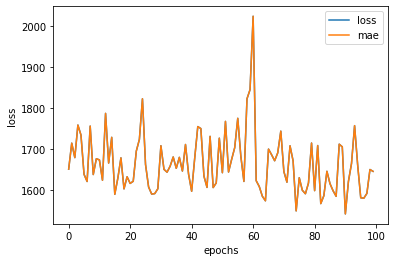

In [196]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history_6.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [ ]:
x["age"].plot(kind="hist")

In [ ]:
x["bmi"].plot(kind="hist")

In [ ]:
x["children"].value_counts()